In [1]:
import requests
import bs4
from bs4 import BeautifulSoup as bs
import urllib.request as ureq
import csv
import re
import numpy as np
import pandas as pd
import nltk
import random

import matplotlib.pyplot as plt

In [2]:
aus = pd.read_csv('aus-forum.csv', encoding="ISO-8859-1")
can = pd.read_csv('Canforum_p70s30.csv', encoding="ISO-8859-1")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,5,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,175,176) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("Australia: "+str(len(aus)))
print("Canada: "+str(len(can)))

Australia: 262242
Canada: 172312


In [4]:
aus['d'] = pd.to_datetime(aus['Date'])
aus['month_year'] = aus['d'].dt.to_period('M')
aus['year'] = aus['d'].dt.year

In [5]:
can['d'] = pd.to_datetime(can['Date'], errors="coerce")
can['month_year'] = can['d'].dt.to_period('M')

In [6]:
print("With valid dates: " + str(can['d'].count()))
print("Including invalid dates: " + str(can['Date'].count()))
print("Difference: " + str(can['Date'].count() - can['d'].count()))

With valid dates: 172212
Including invalid dates: 172312
Difference: 100


In [7]:

aus['year'] = pd.DatetimeIndex(aus['d']).year
can['year'] = pd.DatetimeIndex(can['d']).year

In [8]:
can['year']

0         2019.0
1         2019.0
2         2020.0
3         2020.0
4         2020.0
5         2017.0
6         2018.0
7         2013.0
8         2013.0
9         2013.0
10        2013.0
11        2013.0
12        2013.0
13        2013.0
14        2013.0
15        2013.0
16        2013.0
17        2013.0
18        2013.0
19        2013.0
20        2013.0
21        2014.0
22        2013.0
23        2014.0
24        2014.0
25        2014.0
26        2014.0
27        2014.0
28        2014.0
29        2014.0
           ...  
172282    2009.0
172283    2009.0
172284    2009.0
172285    2009.0
172286    2009.0
172287    2009.0
172288    2009.0
172289    2009.0
172290    2009.0
172291    2009.0
172292    2009.0
172293    2009.0
172294    2009.0
172295    2009.0
172296    2009.0
172297    2009.0
172298    2009.0
172299    2009.0
172300    2009.0
172301    2009.0
172302    2009.0
172303    2009.0
172304    2009.0
172305    2009.0
172306    2009.0
172307    2009.0
172308    2009.0
172309    2009

In [9]:
aus_c = aus.groupby('year', as_index=False).count()
can_c = can.groupby('year', as_index=False).count()

In [10]:
can_c

,year,ID,Link,Date,Username,Message,Country,Like,Topic,Thread,...,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,d,month_year
0,2005.0,38,38,38,21,38,0,38,38,38,...,0,0,0,0,0,0,0,0,38,38
1,2006.0,109,109,109,102,109,0,109,109,109,...,0,0,0,0,0,0,0,0,109,109
2,2007.0,483,483,483,482,483,0,483,483,483,...,0,0,0,0,0,0,0,0,483,483
3,2008.0,1406,1406,1406,1390,1406,0,1406,1406,1406,...,0,0,0,0,0,0,0,0,1406,1406
4,2009.0,4532,4532,4532,4457,4531,0,4530,4530,4530,...,0,0,0,0,0,0,0,0,4532,4532
5,2010.0,7673,7673,7673,7517,7673,0,7673,7673,7673,...,0,0,0,0,0,0,0,0,7673,7673
6,2011.0,9257,9257,9257,9159,9257,0,9257,9257,9257,...,0,0,0,0,0,0,0,0,9257,9257
7,2012.0,12460,12460,12460,12337,12460,0,12460,12460,12460,...,0,0,0,0,0,0,0,0,12460,12460
8,2013.0,13548,13548,13548,13538,13545,0,13548,13548,13548,...,0,0,0,0,0,0,0,0,13548,13548
9,2014.0,13662,13662,13662,13657,13662,0,13662,13662,13662,...,0,0,0,0,0,0,0,0,13662,13662


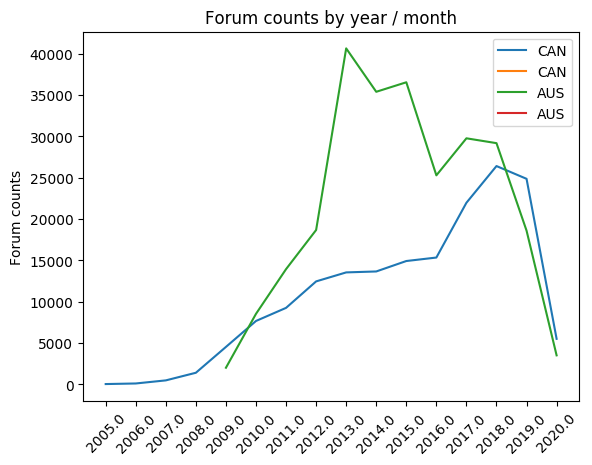

In [11]:
plt.rcdefaults()
fig, ax = plt.subplots()
width = 0.35
#df.groupby('month_year').count()['Link'].plot(ax=ax)

ax.plot(can_c['year'].astype(str), can_c['Link'], width, label="CAN")
ax.plot(aus_c['year'].astype(str), aus_c['Link'], width, label="AUS")

ax.legend()
ax.set_ylabel('Forum counts')
ax.set_title('Forum counts by year / month')
plt.xticks(rotation=45)

#plt.show()

plt.savefig("compare-counts.png")

In [15]:
Cdf1 = pd.read_csv('Cforum_arrival', index_col=0)
#len(Cdf1)
Cdf2 = pd.read_csv('Cforum_aspiration', index_col=0)
Cdf3 = pd.read_csv('Cforum_cost', index_col=0)
Cdf4 = pd.read_csv('Cforum_decision', index_col=0)
Cdf5 = pd.read_csv('Cforum_affect', index_col=0)
Cdf6 = pd.read_csv('Cforum_plan', index_col=0)
Cdf7 = pd.read_csv('Cforum_skills', index_col=0)
Cdf8 = pd.read_csv('Cforum_space', index_col=0)

Adf1 = pd.read_csv('Aforum_arrival', index_col=0)
#len(Cdf1)
Adf2 = pd.read_csv('Aforum_aspiration', index_col=0)
Adf3 = pd.read_csv('Aforum_cost', index_col=0)
Adf4 = pd.read_csv('Aforum_decison', index_col=0)
Adf5 = pd.read_csv('Aforum_affect', index_col=0)
Adf6 = pd.read_csv('Aforum_planning', index_col=0)
Adf7 = pd.read_csv('Aforum_skills', index_col=0)
Adf8 = pd.read_csv('Aforum_space', index_col=0)

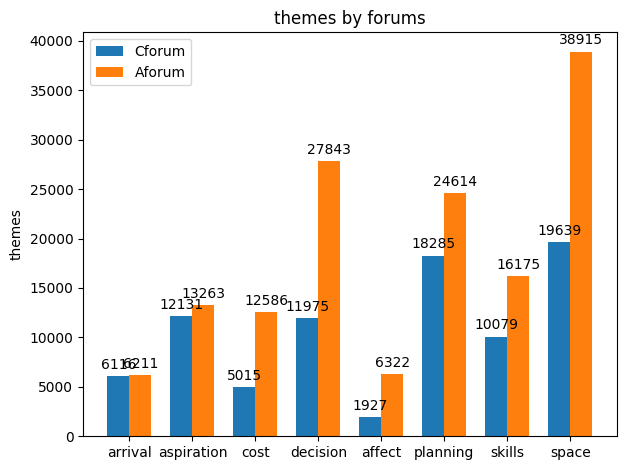

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['arrival', 'aspiration', 'cost', 'decision', 'affect', 'planning', 'skills', 'space']
Cforum = [len(Cdf1), len(Cdf2), len(Cdf3), len(Cdf4), len(Cdf5), len(Cdf6), len(Cdf7), len(Cdf8)]
Aforum = [len(Adf1), len(Adf2), len(Adf3), len(Adf4), len(Adf5), len(Adf6), len(Adf7), len(Adf8)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Cforum, width, label='Cforum')
rects2 = ax.bar(x + width/2, Aforum, width, label='Aforum')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('themes')
ax.set_title('themes by forums')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [28]:
Cdf = pd.read_csv('Cforum_2016', index_col=0)
Cdf1 = pd.read_csv('Cforum_arrival', index_col=0)
Cpc1 = round(100 * len(Cdf1) / len(Cdf), 2)
Cdf2 = pd.read_csv('Cforum_aspiration', index_col=0)
Cpc2 = round(100 * len(Cdf2) / len(Cdf), 2)
Cdf3 = pd.read_csv('Cforum_cost', index_col=0)
Cpc3 = round(100 * len(Cdf3) / len(Cdf), 2)
Cdf4 = pd.read_csv('Cforum_decision', index_col=0)
Cpc4 = round(100 * len(Cdf4) / len(Cdf), 2)
Cdf5 = pd.read_csv('Cforum_affect', index_col=0)
Cpc5 = round(100 * len(Cdf5) / len(Cdf), 2)
Cdf6 = pd.read_csv('Cforum_plan', index_col=0)
Cpc6 = round(100 * len(Cdf6) / len(Cdf), 2)
Cdf7 = pd.read_csv('Cforum_skills', index_col=0)
Cpc7 = round(100 * len(Cdf7) / len(Cdf), 2)
Cdf8 = pd.read_csv('Cforum_space', index_col=0)
Cpc8 = round(100 * len(Cdf8) / len(Cdf), 2)

Adf = pd.read_csv('Aforum_2016', index_col=0)
Adf1 = pd.read_csv('Aforum_arrival', index_col=0)
Apc1 = round(100 * len(Adf1) / len(Adf), 2)
Adf2 = pd.read_csv('Aforum_aspiration', index_col=0)
Apc2 = round(100 * len(Adf2) / len(Adf), 2)
Adf3 = pd.read_csv('Aforum_cost', index_col=0)
Apc3 = round(100 * len(Adf3) / len(Adf), 2)
Adf4 = pd.read_csv('Aforum_decison', index_col=0)
Apc4 = round(100 * len(Adf4) / len(Adf), 2)
Adf5 = pd.read_csv('Aforum_affect', index_col=0)
Apc5 = round(100 * len(Adf5) / len(Adf), 2)
Adf6 = pd.read_csv('Aforum_planning', index_col=0)
Apc6 = round(100 * len(Adf6) / len(Adf), 2)
Adf7 = pd.read_csv('Aforum_skills', index_col=0)
Apc7 = round(100 * len(Adf6) / len(Adf), 2)
Adf8 = pd.read_csv('Aforum_space', index_col=0)
Apc8 = round(100 * len(Adf8) / len(Adf), 2)

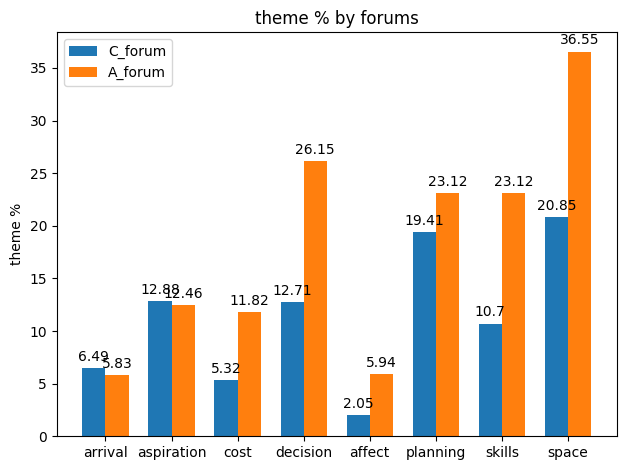

In [29]:
labels = ['arrival', 'aspiration', 'cost', 'decision', 'affect', 'planning', 'skills', 'space']
C_forum = [Cpc1, Cpc2, Cpc3, Cpc4, Cpc5, Cpc6, Cpc7, Cpc8]
A_forum = [Apc1, Apc2, Apc3, Apc4, Apc5, Apc6, Apc7, Apc8]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, C_forum, width, label='C_forum')
rects2 = ax.bar(x + width/2, A_forum, width, label='A_forum')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('theme %')
ax.set_title('theme % by forums')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [11]:
from textblob import TextBlob
import pandas as pd
canada = pd.read_csv('Cforum_2016')

australia = pd.read_csv('Aforum_2016')
canada.head()

,Link,Date,Username,Message,Country,Like,Topic,Thread,Message_lowercase,Message_no_quotes,month_year
0,https://www.canadavisa.com//canada-immigration...,2019-09-30 00:00:00,Prashant-Canada,I’m filing Switzerland Visa for my family as ...,NaN,0,Visa Offices in Europe\nNew,Schengen VISA,i’m filing switzerland visa for my family as a...,i’m filing switzerland visa for my family as a...,2019-09
1,https://www.canadavisa.com//canada-immigration...,2019-06-11 00:00:00,spanishnick,"Hi,<br/><br/>My aunt and uncle applied for a t...",NaN,0,Visa Offices in Europe\nNew,Visa from Paris,"hi,<br/><br/>my aunt and uncle applied for a t...","hi,<br/><br/>my aunt and uncle applied for a t...",2019-06
2,https://www.canadavisa.com//canada-immigration...,2020-01-22 00:00:00,Junaid yasin,I need job in canda,NaN,0,Visa Offices in Europe\nNew,Need job and visa in canda,i need job in canda,i need job in canda,2020-01
3,https://www.canadavisa.com//canada-immigration...,2020-01-22 00:00:00,Junaid yasin,"<blockquote class=""bbCodeBlock bbCodeBlock--ex...",NaN,0,Visa Offices in Europe\nNew,Need job and visa in canda,"<blockquote class=""bbcodeblock bbcodeblock--ex...","<a class=""link link--internal"" href=""https://w...",2020-01
4,https://www.canadavisa.com//canada-immigration...,2020-01-23 00:00:00,canuck_in_uk,can possible without IELTS test LMIA i am from...,NaN,1,Visa Offices in Europe\nNew,Need job and visa in canda,can possible without ielts test lmia i am from...,can possible without ielts test lmia i am from...,2020-01


In [32]:
from textblob import TextBlob
canada['Message_no_quotes'][:5].apply(lambda x: str(TextBlob(x).correct()))
canada['Message_no_quotes'].head()

0    i’m filing switzerland visa for my family as a...
1    hi,<br/><br/>my aunt and uncle applied for a t...
2                                  i need job in canda
3    <a class="link link--internal" href="https://w...
4    can possible without ielts test lmia i am from...
Name: Message_no_quotes, dtype: object

In [34]:
canada = canada[canada['Message_no_quotes'].notnull()]
canada.head()

,Link,Date,Username,Message,Country,Like,Topic,Thread,Message_lowercase,Message_no_quotes,month_year
0,https://www.canadavisa.com//canada-immigration...,2019-09-30 00:00:00,Prashant-Canada,I’m filing Switzerland Visa for my family as ...,NaN,0,Visa Offices in Europe\nNew,Schengen VISA,i’m filing switzerland visa for my family as a...,i’m filing switzerland visa for my family as a...,2019-09
1,https://www.canadavisa.com//canada-immigration...,2019-06-11 00:00:00,spanishnick,"Hi,<br/><br/>My aunt and uncle applied for a t...",NaN,0,Visa Offices in Europe\nNew,Visa from Paris,"hi,<br/><br/>my aunt and uncle applied for a t...","hi,<br/><br/>my aunt and uncle applied for a t...",2019-06
2,https://www.canadavisa.com//canada-immigration...,2020-01-22 00:00:00,Junaid yasin,I need job in canda,NaN,0,Visa Offices in Europe\nNew,Need job and visa in canda,i need job in canda,i need job in canda,2020-01
3,https://www.canadavisa.com//canada-immigration...,2020-01-22 00:00:00,Junaid yasin,"<blockquote class=""bbCodeBlock bbCodeBlock--ex...",NaN,0,Visa Offices in Europe\nNew,Need job and visa in canda,"<blockquote class=""bbcodeblock bbcodeblock--ex...","<a class=""link link--internal"" href=""https://w...",2020-01
4,https://www.canadavisa.com//canada-immigration...,2020-01-23 00:00:00,canuck_in_uk,can possible without IELTS test LMIA i am from...,NaN,1,Visa Offices in Europe\nNew,Need job and visa in canda,can possible without ielts test lmia i am from...,can possible without ielts test lmia i am from...,2020-01


In [37]:
#removing stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marinakhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
canada['Message_nostop'] = canada['Message_no_quotes'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
canada['Message_nostop'].head()

0    i’m filing switzerland visa family tourist .<b...
1    hi,<br/><br/>my aunt uncle applied tourist vis...
2                                       need job canda
3    <a class="link link--internal" href="https://w...
4    possible without ielts test lmia pakistan work...
Name: Message_nostop, dtype: object

In [40]:
from textblob import Word
canada['Message_lemmatized'] = canada['Message_nostop'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
canada['Message_lemmatized'].head()

0    i’m filing switzerland visa family tourist .<b...
1    hi,<br/><br/>my aunt uncle applied tourist vis...
2                                       need job canda
3    <a class="link link--internal" href="https://w...
4    possible without ielts test lmia pakistan work...
Name: Message_lemmatized, dtype: object

In [42]:
#term frequency
tf_canada = (canada['Message_lemmatized'][1:30]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf_canada.columns = ['words','tf']
tf_canada

,words,tf
0,canadian,3.0
1,tourist,2.0
2,embassy,3.0
3,ago,3.0
4,visa,6.0
5,paris,2.0
6,month,3.0
7,system,1.0
8,-,1.0
9,(a,1.0


In [43]:
canada['Message_lemmatized'][:10].apply(lambda x: TextBlob(x).sentiment)

0    (0.03333333333333333, 0.28214285714285714)
1                    (0.26666666666666666, 0.3)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4                                    (0.0, 1.0)
5                                    (0.0, 0.4)
6    (0.19722222222222222, 0.48888888888888893)
7                         (-0.078125, 0.171875)
8                                    (0.0, 0.0)
9                                    (0.0, 0.0)
Name: Message_lemmatized, dtype: object

In [44]:
#looking at only polarity. Value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. 
canada['Message_sentiment'] = canada['Message_lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])
canada[['Message_lemmatized','Message_sentiment'][0:10]]
#len(df['Message_sentiment'].index)

,Message_lemmatized,Message_sentiment
0,i’m filing switzerland visa family tourist .<b...,0.033333
1,"hi,<br/><br/>my aunt uncle applied tourist vis...",0.266667
2,need job canda,0.000000
3,"<a class=""link link--internal"" href=""https://w...",0.000000
4,possible without ielts test lmia pakistan work...,0.000000
5,passport requested cic uk (am currently canada...,0.000000
6,"hi all, <br/>i accepted postdoc alberta univer...",0.197222
7,hello guy pnp applicant waiting medical reques...,-0.078125
8,"<br/>it sent upfront, application.",0.000000
9,"sponsoring spouse, know someone sponsored with...",0.000000


In [52]:

#compute sentiment scores (polarity) per message in Cforum from 2016

sentiment_scores_tb = [round(TextBlob(messages).sentiment.polarity, 3) for messages in canada['Message_no_quotes']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

#sentiment statistics per Message and csv with sentiment categories

canada_sentiments = pd.DataFrame([list(canada['Message_no_quotes']), sentiment_scores_tb, sentiment_category_tb]).T
canada_sentiments.columns = ['Messages', 'sentiment_score', 'sentiment_category']
canada_sentiments['sentiment_score'] = canada_sentiments.sentiment_score.astype('float')
canada_sentiments.groupby(by=['Messages']).describe()
canada_sentiments.head()


,Messages,sentiment_score,sentiment_category
0,i’m filing switzerland visa for my family as a...,0.033,positive
1,"hi,<br/><br/>my aunt and uncle applied for a t...",0.227,positive
2,i need job in canda,0.000,neutral
3,"<a class=""link link--internal"" href=""https://w...",0.000,neutral
4,can possible without ielts test lmia i am from...,0.000,neutral


In [54]:
from bs4 import BeautifulSoup
canada_sentiments['Messages'] = [BeautifulSoup(text).get_text() for text in canada_sentiments['Messages']]
canada_sentiments['Messages'].head()

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://www.gov.uk/browse/visas-immigration/work-visas" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/py

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.canadavisa.com/canada-immigration-discussion-board/kingston-jamaica-new-applicationas-of-dec-7-2016-t487168.0.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://docs.google.com/spreadsheets/d/1pqjp_exoeo1hqgqmwnbkkz-qmwszw7r9uuotjhfpotg/edit?usp=sharing" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.canadavisa.com/canada-immigration-discussion-board/spo

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www2.gov.bc.ca/gov/content/health/health-drug-coverage/msp/bc-residents/eligibility-and-enrolment/how-to-enrol" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.canadavisa.com/canada-immigration-discussion-board/need-information-on-sponsership-t469079.0.html;msg5702841#msg5702841" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.cic.gc.ca/english/express-entry/

0    i’m filing switzerland visa for my family as a...
1    hi,my aunt and uncle applied for a tourist vis...
2                                  i need job in canda
3    https://www.canadavisa.com/canada-immigration-...
4    can possible without ielts test lmia i am from...
Name: Messages, dtype: object

In [55]:
#generate a csv of all messages and show whether a message is positive, negative or neutral
import csv
with open("sentimentanalysis_cforum", "w") as _file:
    writer = csv.writer(_file)
    writer.writerow(canada_sentiments.columns.values)
    for index, row in canada_sentiments.iterrows():
        writer.writerow(row)

45.66161216502342
15.644716299163761
38.69367153581282


([<matplotlib.patches.Wedge at 0x1a2d55c748>,
 [Text(-1.0897989107401667, 0.1494601423441939, 'positive'),
  Text(0.23887629362165752, -1.073749559415779, 'negative'),
  Text(1.0313350870110634, 0.3825544906283059, 'neutral')],
 [Text(-0.5944357694946363, 0.08152371400592395, '45.7%'),
  Text(0.13029616015726772, -0.5856815778631522, '15.6%'),
  Text(0.5625464110969436, 0.20866608579725773, '38.7%')])

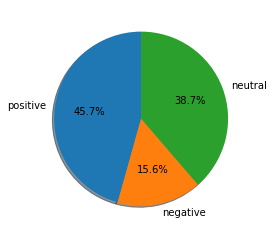

In [72]:
#Total no. of postive, negative and neutral messages and their comparative percentages
PositiveSentCforum = canada_sentiments.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSentCforum[PositiveSentCforum == True].index)
pctPos = numOfPositiveRows/len(canada_sentiments)*100
print(pctPos)
NegativeSentCforum = canada_sentiments.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSentCforum[NegativeSentCforum == True].index)
pctNeg = numOfNegativeRows/len(canada_sentiments)*100
print(pctNeg)
NeutralSentCforum = canada_sentiments.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSentCforum[NeutralSentCforum == True].index)
pctNeut = numOfNeutralRows/len(canada_sentiments)*100
print(pctNeut)

import matplotlib.pyplot as plt

labels = 'positive', 'negative', 'neutral'
sizes = [pctPos, pctNeg, pctNeut]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

In [74]:
australia = pd.read_csv('Aforum_2016')
australia.head()

,Link,Date,Username,Message,Country,Like,Topic,Thread,Message_lowercase,Message_nopunct
0,https://www.australiaforum.com/visas-immigrati...,2017-11-14 06:47:00,Mish,\r\n\t\t\t\r\n\t\t\tHi All \n \nOn this forum ...,australia,3675.0,Visas and immigration,Registered Migration Agents,hi all on this forum we are reguarly asked abo...,hi all on this forum we are reguarly asked abo...
1,https://www.australiaforum.com/visas-immigrati...,2020-03-19 06:32:00,aussiesteve,\r\n\t\t\t\r\n\t\t\tThis will certainly change...,australia,624.0,Visas and immigration,Total Ban on entry into Australia,this will certainly change everything australi...,this will certainly change everything australi...
2,https://www.australiaforum.com/visas-immigrati...,2020-03-19 09:09:00,Sam1993,\r\n\t\t\t\r\n\t\t\tI have applied 820 visa an...,NaN,0.0,Visas and immigration,Total Ban on entry into Australia,i have applied 820 visa and i have bridging vi...,i have applied 820 visa and i have bridging vi...
3,https://www.australiaforum.com/visas-immigrati...,2020-03-19 09:33:00,aussiesteve,\n \n Quote: \n \n \n \n \r\n\t\t\t\t\tOrigina...,australia,624.0,Visas and immigration,Total Ban on entry into Australia,quote: originally posted by sam1993 i have app...,quote originally posted by sam1993 i have appl...
4,https://www.australiaforum.com/visas-immigrati...,2020-03-19 09:51:00,SLBee,\r\n\t\t\t\r\n\t\t\tNo need for the partner vi...,NaN,15.0,Visas and immigration,Total Ban on entry into Australia,no need for the partner visa applicants and sp...,no need for the partner visa applicants and sp...


In [76]:
australia['Message_nopunct'][:5].apply(lambda x: str(TextBlob(x).correct()))
australia['Message_nopunct'].head()

0    hi all on this forum we are reguarly asked abo...
1    this will certainly change everything australi...
2    i have applied 820 visa and i have bridging vi...
3    quote originally posted by sam1993 i have appl...
4    no need for the partner visa applicants and sp...
Name: Message_nopunct, dtype: object

In [83]:
australia = australia[australia['Message_nopunct'].notnull()]
australia.head()

from nltk.corpus import stopwords
stop = stopwords.words('english')
australia['Message_nostop'] = australia['Message_nopunct'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#australia['Message_nostop'].head()

#term frequency
tf_australia = (australia['Message_nostop'][1:30]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf_australia.columns = ['words','tf']
tf_australia

,words,tf
0,coronavirus,3.0
1,blocks,1.0
2,httpwwwabcnetaunews2020031ralia12071640,1.0
3,travel,25.0
4,australia,16.0
5,expanded,1.0
6,change,1.0
7,arrival,1.0
8,everything,1.0
9,nonresidents,1.0


In [84]:
australia['Message_sentiment'] = australia['Message_nopunct'].apply(lambda x: TextBlob(x).sentiment[0])
australia[['Message_nopunct','Message_sentiment'][0:10]]

,Message_nopunct,Message_sentiment
0,hi all on this forum we are reguarly asked abo...,0.250000
1,this will certainly change everything australi...,0.214286
2,i have applied 820 visa and i have bridging vi...,0.500000
3,quote originally posted by sam1993 i have appl...,0.200000
4,no need for the partner visa applicants and sp...,-0.041667
5,australias international aviation industry is ...,-0.012198
6,quote originally posted by slbee no need for t...,0.243750
7,quote originally posted by slbee no need for t...,0.050417
8,hi everyone i am on a 309 waiting for a decisi...,0.175000
9,quote originally posted by mattfourmat hi ever...,0.253571


In [85]:
#compute sentiment scores (polarity) per message in Aforum from 2016

sentiment_scores_tb = [round(TextBlob(messages).sentiment.polarity, 3) for messages in australia['Message_nopunct']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

#sentiment statistics per Message and csv with sentiment categories

australia_sentiments = pd.DataFrame([list(australia['Message_nopunct']), sentiment_scores_tb, sentiment_category_tb]).T
australia_sentiments.columns = ['Messages', 'sentiment_score', 'sentiment_category']
australia_sentiments['sentiment_score'] = australia_sentiments.sentiment_score.astype('float')
australia_sentiments.groupby(by=['Messages']).describe()
australia_sentiments.head()



,Messages,sentiment_score,sentiment_category
0,hi all on this forum we are reguarly asked abo...,0.250,positive
1,this will certainly change everything australi...,0.214,positive
2,i have applied 820 visa and i have bridging vi...,0.500,positive
3,quote originally posted by sam1993 i have appl...,0.200,positive
4,no need for the partner visa applicants and sp...,-0.042,negative


In [86]:
#generate a csv of all messages and show whether a message is positive, negative or neutral
import csv
with open("sentimentanalysis_Aforum", "w") as _file:
    writer = csv.writer(_file)
    writer.writerow(australia_sentiments.columns.values)
    for index, row in australia_sentiments.iterrows():
        writer.writerow(row)

73.01672353986294
13.315848350677308
13.66742810945975


([<matplotlib.patches.Wedge at 0x1a26b4e630>,
 [Text(-0.8247399325459379, -0.727876393121883, 'positive'),
  Text(1.0528919259807799, 0.31846285843797234, 'negative'),
  Text(0.4579329023144528, 1.000148717430494, 'neutral')],
 [Text(-0.449858145025057, -0.39702348715739066, '73.0%'),
  Text(0.5743046868986071, 0.17370701369343944, '13.3%'),
  Text(0.2497815830806106, 0.5455356640529967, '13.7%')])

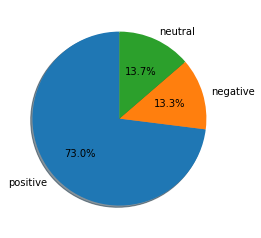

In [87]:
#Total no. of postive, negative and neutral messages and their comparative percentages
PositiveSentAforum = australia_sentiments.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRowsA = len(PositiveSentAforum[PositiveSentAforum == True].index)
pctPosA = numOfPositiveRowsA/len(australia_sentiments)*100
print(pctPosA)
NegativeSentAforum = australia_sentiments.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRowsA = len(NegativeSentAforum[NegativeSentAforum == True].index)
pctNegA = numOfNegativeRowsA/len(australia_sentiments)*100
print(pctNegA)
NeutralSentAforum = australia_sentiments.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRowsA = len(NeutralSentAforum[NeutralSentAforum == True].index)
pctNeutA = numOfNeutralRowsA/len(australia_sentiments)*100
print(pctNeutA)

import matplotlib.pyplot as plt

labels = 'positive', 'negative', 'neutral'
sizes = [pctPosA, pctNegA, pctNeutA]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.